# Test epidemiology simulator

In [49]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline

from goldmine.simulators.epidemiology import Epidemiology

In [59]:
simulator = Epidemiology(n_time_steps=20)

## Run simulation

In [60]:
theta = np.array([3.59,0.59,0.097])

In [61]:
x, t_xz, histories = simulator.rvs_score(theta, theta, 1000, return_histories=True)

/Users/johannbrehmer/work/projects/higgs_inference/goldmine/goldmine/simulators/epidemiology.py:117: RuntimeWarning: divide by zero encountered in true_divide
  * np.broadcast_to(1. / np.sum(state, axis=1), (self.n_strains, self.n_individuals)).T)
/Users/johannbrehmer/work/projects/higgs_inference/goldmine/goldmine/simulators/epidemiology.py:117: RuntimeWarning: invalid value encountered in multiply
  * np.broadcast_to(1. / np.sum(state, axis=1), (self.n_strains, self.n_individuals)).T)


## Evolution

In [62]:
x_histories = [
    [simulator._calculate_observables(state) for state in history]
      for history in histories
]

x_histories = np.array(x_histories)

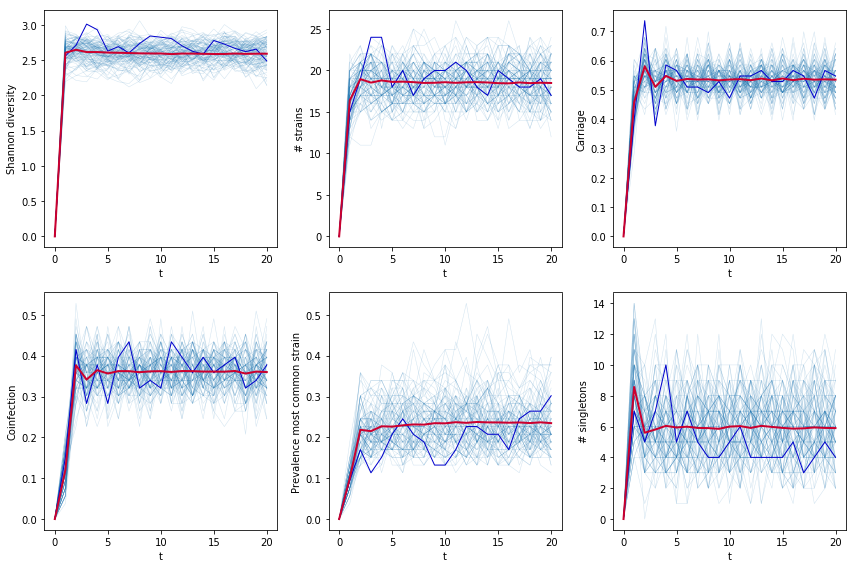

In [63]:
labels=['Shannon diversity', '# strains', 'Carriage', 'Coinfection', 'Prevalence most common strain', '# singletons']

plt.figure(figsize=(12.,8.))

for o in range(6):
    ax = plt.subplot(2,3,o+1)
    
    for i in range(100):
        plt.plot(x_histories[i,:,o],
                 c='C0', lw=0.5, alpha=0.2)
    plt.plot(x_histories[100,:,o],
             c='mediumblue', lw=1., alpha=1.)
        
    plt.plot(np.mean(x_histories[:,:,o], axis=0),
             c='#CC002E', lw=2., alpha=1.)
        
    plt.xlabel('t')
    plt.ylabel(labels[o])
        
plt.tight_layout()
plt.show()

## Observed data

In [64]:
# From E. Numminen's supplementary data
carriage_obs = np.array(
    [3.883369e-01, 7.337809e-01, 1.060615e+00, 1.150345e+00, 3.526554e-01, 8.434849e-01, 7.387577e-01,
       1.427698e+00, 1.295897e+00, 3.409176e-01, 4.653105e-01, 1.052145e+00, 3.227289e-01, 5.264471e-01,
       7.806777e-01, 5.709255e-01, 6.790006e-01, 1.191013e+00, 1.012025e+00, 1.059993e+00, 5.385902e-01,
       5.042522e-01, 1.706727e+00, 5.889343e-01, 6.478070e-01, 6.827895e-01, 7.610699e-01, 1.616749e+00,
       7.092514e-01, 1.720453e+00, 8.710406e-01, 5.609449e-01, 1.122397e+00, 6.152822e-01, 1.132041e+00,
       1.748254e+00, 9.441443e-01, 7.432614e-01, 1.144658e+00, 4.881177e-01, 1.121355e+00, 1.260259e+00,
       8.449367e-01, 1.185121e+00, 7.437796e-01, 1.551210e+00, 9.959612e-01, 7.874593e-01, 6.128690e-01,
       7.733636e-01, ]
)
coinfection_obs = np.array(
 [6.774062e-01, 1.008608e+00, 1.003448e+00, 1.496480e+00, 1.320940e+00, 1.737768e+00, 1.358647e+00,
               1.003843e+00, 1.436854e+00, 1.015024e+00, 7.407873e-01, 7.664965e-01, 1.017034e+00, 6.601900e-01,
               1.478489e+00, 9.774308e-01, 1.252614e+00, 9.044375e-01, 6.211532e-01, 8.415828e-01, 1.773170e+00,
               9.282943e-01, 1.093411e+00, 1.291557e+00, 7.086228e-01, 1.749981e+00, 1.009684e+00, 1.673514e+00,
               1.562626e+00, 8.747819e-01, 1.276379e+00, 1.141282e+00, 1.454902e+00, 1.770207e+00, 1.620572e+00,
               7.934708e-01, 1.570419e+00, 1.254364e+00, 6.686331e-01, 1.622827e+00, 1.715413e+00, 1.517456e+00,
               1.769213e+00, 1.058389e+00, 6.801449e-01, 1.102303e+00, 7.099977e-01, 5.647965e-01, 1.355006e+00,
               1.716762e+00, ]
)
shannon_diversity_obs = np.array(
    [3.517563e+00, 1.964441e+00, 4.142780e+00, 3.393059e+00, 4.340226e+00, 1.708228e+00, 2.823222e+00,
        4.279301e+00, 3.003564e+00, 4.402021e+00, 4.475416e+00, 2.294411e+00, 3.978364e+00, 5.169807e+00,
        3.510735e+00, 4.626391e+00, 2.598493e+00, 2.341537e+00, 2.573998e+00, 3.931226e+00, 3.938630e+00,
        5.110109e+00, 2.888176e+00, 3.130062e+00, 4.677410e+00, 4.952005e+00, 2.351636e+00, 1.443350e+00,
        3.349285e+00, 4.598584e+00, 4.483062e+00, 1.644808e+00, 3.322732e+00, 3.897572e+00, 3.041200e+00,
        2.162645e+00, 3.756860e+00, 2.051850e+00, 1.360072e+00, 1.372980e+00, 2.683688e+00, 1.663124e+00,
        3.969461e+00, 4.183121e+00, 3.150315e+00, 2.502235e+00, 2.960014e+00, 2.773636e+00, 4.627124e+00,
        1.967244e+00, ]
)
prevalence_most_common_strain_obs = np.array(
    [7.696044e-01, 1.131331e+00, 1.788280e+00, 1.202427e+00, 1.565102e+00, 8.868746e-01, 9.832330e-01,
        1.391626e+00, 9.032287e-01, 1.317082e+00, 9.468479e-01, 5.143879e-01, 1.684193e+00, 1.658612e+00,
        7.773799e-01, 1.288324e+00, 6.733327e-01, 9.924819e-01, 1.037287e+00, 1.502192e+00, 1.116573e+00,
        1.649845e+00, 8.809702e-01, 1.239786e+00, 1.750762e+00, 1.507603e+00, 4.819323e-01, 6.366301e-01,
        1.139532e+00, 1.202781e+00, 1.493025e+00, 7.468398e-01, 8.177449e-01, 9.432826e-01, 5.826805e-01,
        1.123202e+00, 7.229687e-01, 8.362439e-01, 5.508046e-01, 6.503846e-01, 9.194957e-01, 7.182208e-01,
        6.395713e-01, 1.507757e+00, 5.233812e-01, 7.925366e-01, 3.940224e-01, 1.121306e+00, 1.411136e+00,
        9.419757e-01, ]
)
n_strains_obs = np.array(
    [21, 11, 21, 24, 23, 8, 18, 25, 19, 32, 29, 24, 19, 33, 27, 33, 21, 15, 18, 20, 28, 32, 17, 14, 34, 32,
        22, 10, 24, 35, 31, 14, 23, 32, 22, 16, 29, 17, 8, 15, 21, 9, 29, 25, 26, 10, 22, 15, 29, 13, ]
)
n_singleton_strains_obs = np.array(
    [12, 11, 23, 15, 5, 7, 12, 19, 13, 26, 11, 11, 17, 32, 14, 31, 22, 26, 11, 8, 21, 22, 11, 10, 41, 34, 29,
        5, 19, 21, 36, 10, 10, 27, 28, 15, 24, 18, 10, 14, 29, 2, 23, 42, 21, 6, 16, 14, 39, 7, ]
)

x_observed = np.vstack([
    shannon_diversity_obs,
    n_strains_obs,
    carriage_obs,
    coinfection_obs,
    prevalence_most_common_strain_obs,
    n_singleton_strains_obs
]).T

## x distributions: simulator vs observed

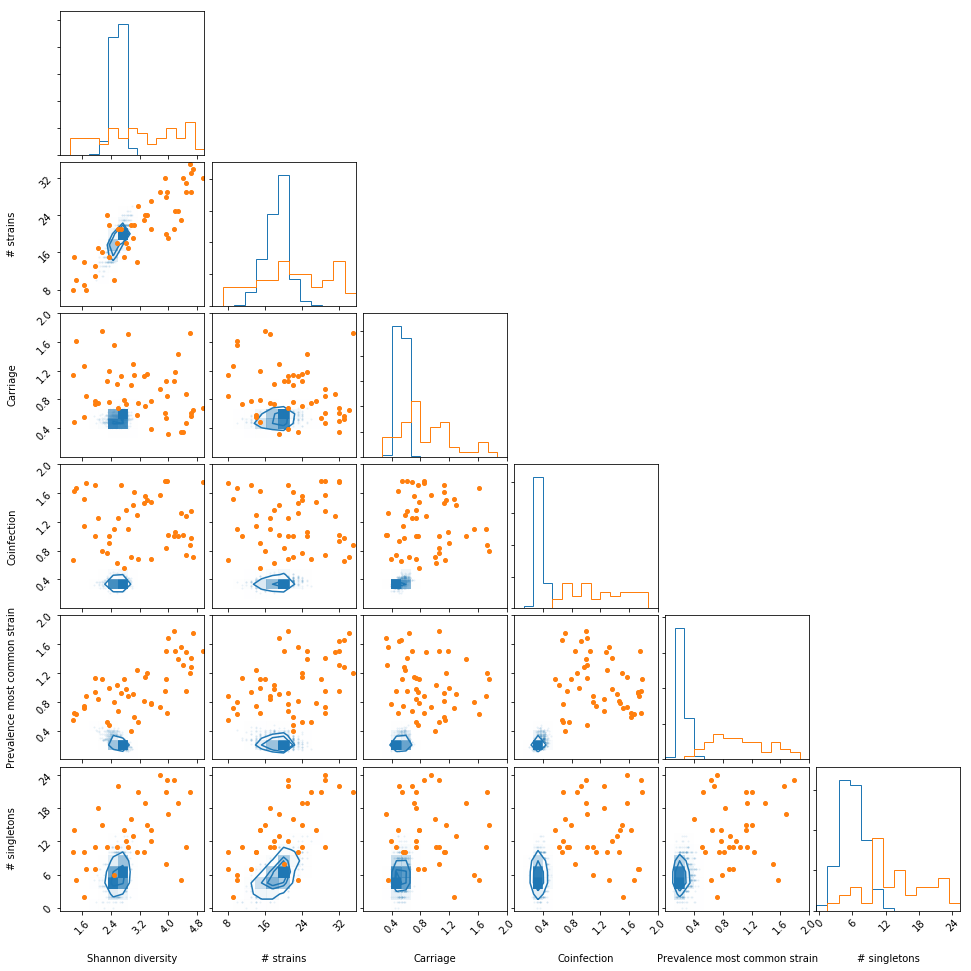

In [65]:
x_ranges = [(1.,5.), (4.5,35.5), (0., 2.), (0.,2.), (0.,2.0), (-0.5,25.5)]
x_bins = [15,13,15,15,15,13]

figure = corner.corner(x,
                       labels=['Shannon diversity', '# strains', 'Carriage',
                               'Coinfection', 'Prevalence most common strain', '# singletons'],
                       range=x_ranges,
                       bins=x_bins,
                       color='C0', truth_color='C1')

# Extract the axes
axes = np.array(figure.axes).reshape((6, 6))

# Loop over the diagonal
for i in range(6):
    ax = axes[i, i]
    ax.hist(x_observed[:, i],
            weights=[x.shape[0] / x_observed.shape[0]]*x_observed.shape[0],
            bins=x_bins[i], range=x_ranges[i],
            histtype='step', color="C1")

# Loop over the histograms
for yi in range(6):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.plot(x_observed[:, xi], x_observed[:, yi],
                marker='o', ms=4., linestyle=' ',
                c="C1")
